In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from vocalseg.examples import mouse
from vocalseg.utils import butter_bandpass_filter, spectrogram, int16tofloat32, plot_spec

In [14]:
# load data
rate, data = mouse()
# filter data
data = butter_bandpass_filter(int16tofloat32(data), 500, 120000, rate)

In [15]:
figsize = (20,3)

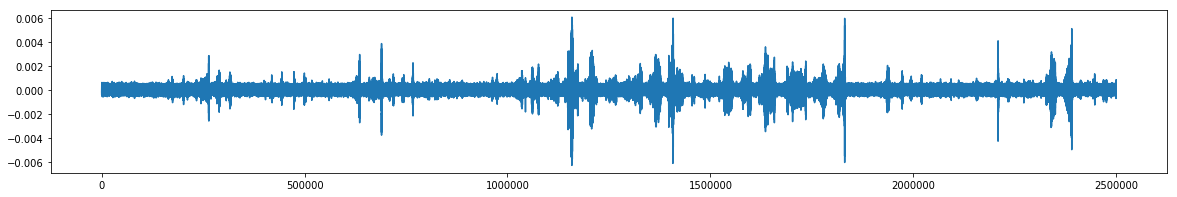

In [16]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(data)

### Generate spectrogram

In [98]:
### parameters
n_fft=4096
hop_length_ms=1
win_length_ms=4
ref_level_db=20
pre=0.97
min_level_db=-70
silence_threshold = 0.01
min_silence_for_spec=0.1
max_vocal_for_spec=1.0,
min_syllable_length_s = 0.01
spectral_range = [50000, 100000]

In [99]:
spec = spectrogram(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
)
np.shape(spec)

(2049, 10001)

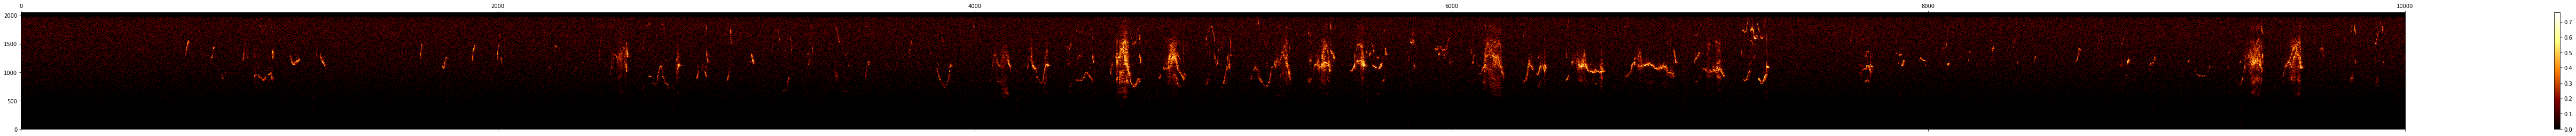

In [100]:
fig, ax = plt.subplots(figsize=figsize)
plot_spec(spec, fig, ax);

### generate spectrogram using dynamic thresholding

In [101]:
from vocalseg.dynamic_thresholding import dynamic_spectrogram

In [102]:
results = dynamic_spectrogram(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
    silence_threshold = silence_threshold,
    verbose=True,
    spectral_range = spectral_range,
    min_syllable_length_s = min_syllable_length_s
    
)
#print(len(results['onsets']))

longest silence 0.0
longest vocalization 10.001
Current min_level_db: -70
longest silence 0.0
longest vocalization 10.001
Current min_level_db: -65
longest silence 0.2400000000000002
longest vocalization 0.22299999999999986


In [103]:
figsize = (100, 4)

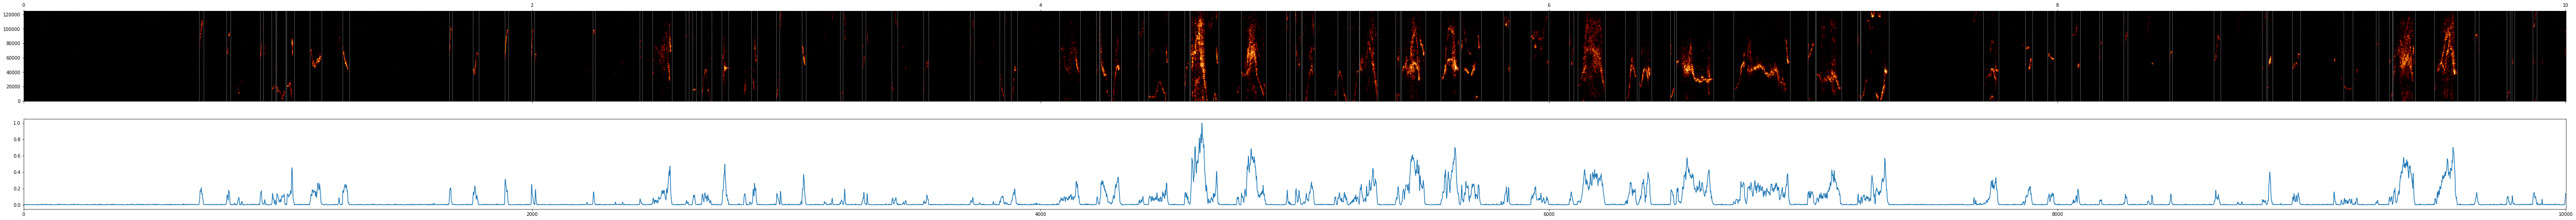

In [104]:
fig, axs = plt.subplots(nrows = 2, figsize=(figsize[0], figsize[1]*2))
plot_spec(results['spec'], fig, axs[0], rate = rate, hop_len_ms= hop_length_ms, show_cbar=False);
axs[1].plot(results['vocal_envelope'])
#axs[1].plot(results['vocal_envelope'] > silence_threshold)
axs[1].set_xlim([0, len(results['vocal_envelope'])])

for onset in results['onsets']:
    axs[0].axvline(onset, color = '#FFFFFF', ls="dashed", lw=0.5)
    
for offset in results['offsets']:
    axs[0].axvline(offset, color = '#FFFFFF', ls="dashed", lw=0.5)